<a href="https://colab.research.google.com/github/shubhamjha8090/Demand-Prediction-For-Public-Transport/blob/main/Transport_Demand_Prediction_Shubham_Jha_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/uploaded files/train_revised.csv')

In [ ]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49


In [ ]:
dataset.shape

(51645, 10)

We have 51645 rows and 10 columns.





In [ ]:
dataset.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-2017,07:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


From above table we are getting the following information: 

1.   We have 2 payment Methods.
2.   In travel_date we have 149 unique days.

1.   We have 2 types of cars and most of them are Bus.









## We Don't have a Dependant Varible, Lets find it.

In [ ]:
# lets find Dependant variable
dependant_variable = dataset.groupby(['ride_id'])['seat_number'].count().reset_index()
dependant_variable.head()


,ride_id,seat_number
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [ ]:
# drop Duplicate rows. 
dataset= dataset.drop_duplicates(subset='ride_id')

In [ ]:
dataset.shape

(6249, 10)

In [ ]:
# Merge our dependent variable with our dataset.
dataset = dataset.merge(dependant_variable, how="left",on="ride_id")
dataset.head()

,ride_id,seat_number_x,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seat_number_y
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49,31


In [ ]:
# renaming columns.
dataset.rename(columns={'seat_number_x':'seat_number','seat_number_y':'number_of_tickets'},inplace= True)
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49,31


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ride_id            6249 non-null   int64 
 1   seat_number        6249 non-null   object
 2   payment_method     6249 non-null   object
 3   payment_receipt    6249 non-null   object
 4   travel_date        6249 non-null   object
 5   travel_time        6249 non-null   object
 6   travel_from        6249 non-null   object
 7   travel_to          6249 non-null   object
 8   car_type           6249 non-null   object
 9   max_capacity       6249 non-null   int64 
 10  number_of_tickets  6249 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 585.8+ KB


We have no null values.

# **EDA**

### Let's create some plots to understand our data.

In [ ]:
dataset.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'number_of_tickets'],
      dtype='object')

In [ ]:
features =['payment_method', 'car_type',
       'max_capacity']

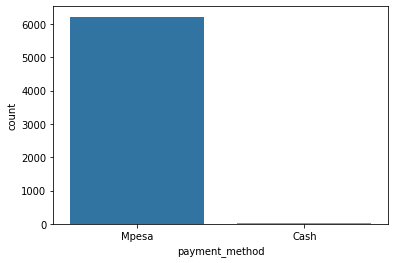

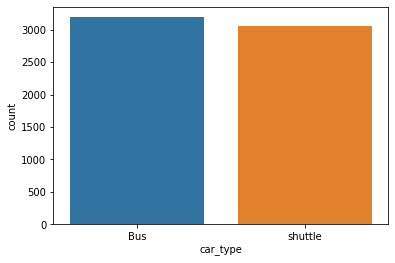

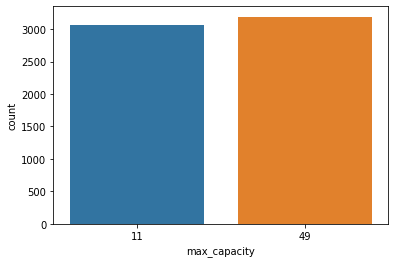

In [ ]:
for col in features:
  sns.countplot(dataset[col])
  plt.show()
   

Observations:

1.   We have two types of payment Method Mpesa and cash, people rarely pay Cash.
2.   We have two types of car 'Bus and Shuttle' which has maximum capacity of 49 and 11.



In [ ]:
# parameters for pie chart.
traffic_from = dataset['travel_from'].value_counts().index
traffic_from_val = dataset['travel_from'].value_counts().values

([<matplotlib.patches.Wedge at 0x7fa01171f450>,
 [Text(-0.33106608034845963, 1.0489972595020005, 'Kisii'),
  Text(-0.5281552579411196, -0.9649103707128189, 'Rongo'),
  Text(0.3284578414537751, -1.0498168632611724, 'Kijauri'),
  Text(0.8537698201922337, -0.6935972131784565, 'Migori'),
  Text(1.0731974145629897, -0.2413447935533614, 'Homa Bay')],
 [Text(-0.18058149837188706, 0.5721803233647275, '59.73%'),
  Text(-0.28808468614970156, -0.5263147476615375, '14.60%'),
  Text(0.17915882261115004, -0.5726273799606394, '11.00%'),
  Text(0.46569262919576376, -0.3783257526427944, '7.63%'),
  Text(0.5853804079434489, -0.13164261466546984, '7.04%')])

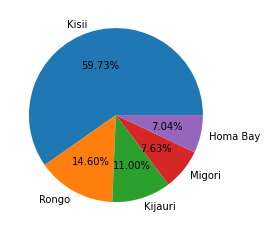

In [ ]:
# top 5 places where most people are comming.

plt.pie(traffic_from_val[:5], labels=traffic_from[:5], autopct='%1.2f%%')

Observation: Most people are travelling from Kisii 59.73%, followed by Rango- 14.60%, kijauri-11%, Migori-7.63%, Homa Bay-7.04% etc.

In [ ]:
dataset.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'number_of_tickets'],
      dtype='object')

In [ ]:
# creating dataframe to analyse Routes.
routes_tickets = dataset.groupby(['travel_from'])['number_of_tickets'].sum().reset_index()
routes_tickets


,travel_from,number_of_tickets
0,Awendo,1788
1,Homa Bay,6304
2,Kehancha,1909
3,Kendu Bay,1
4,Keroka,988
5,Keumbu,22
6,Kijauri,1031
7,Kisii,22607
8,Mbita,378
9,Migori,7027


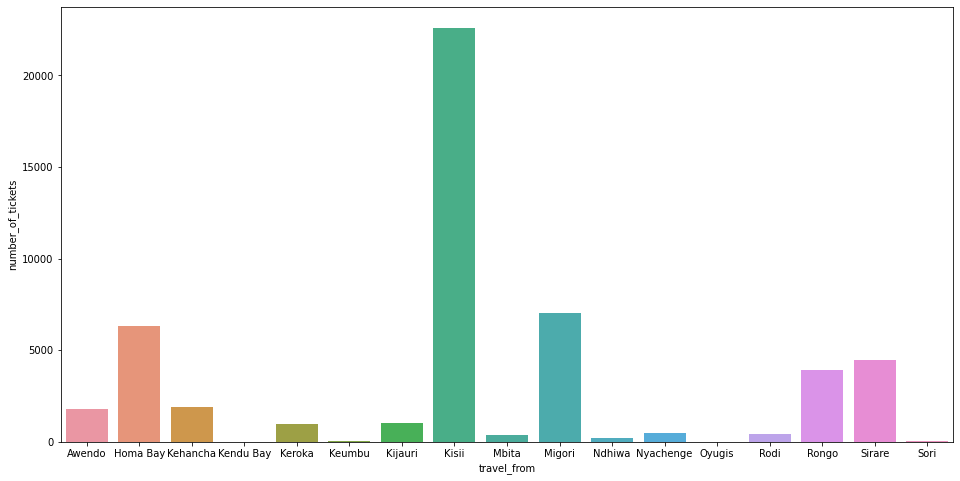

In [ ]:
plt.rcParams['figure.figsize']= (16,8)
sns.barplot(x= 'travel_from',y= 'number_of_tickets', data= routes_tickets)

In the above plot we can see the Total number of ticket sold for each Routes.



*   we can see that Kisii has most number of tickets sold.











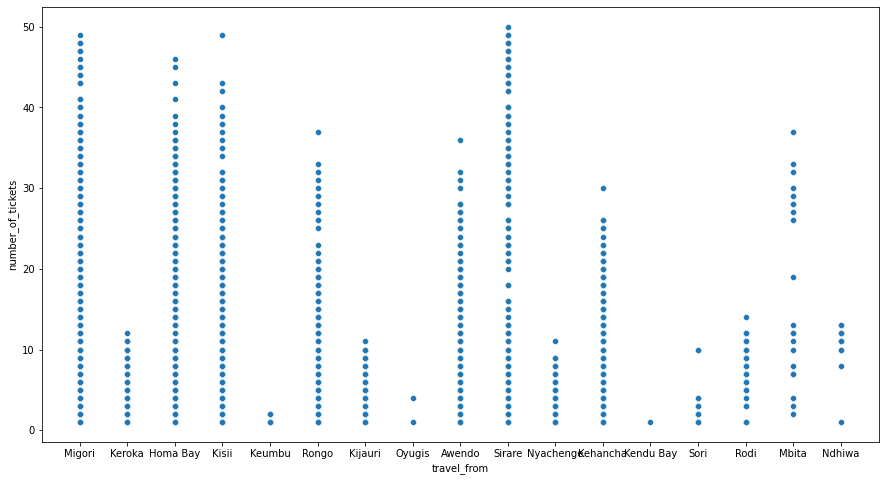

In [ ]:
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x= 'travel_from',y= 'number_of_tickets', data= dataset)

In above scatter plot we can see the distribution of number of tickets in different Routes.

# **Feature Engineering** 

In [ ]:
#Lets convert  teavel_date and travel_time columns to datetime format.
dataset["travel_date"]=pd.to_datetime(dataset["travel_date"])
dataset['travel_time']=pd.to_datetime(dataset["travel_time"])


In [ ]:
#Lets extract the important features from teavel_date and travel_time columns.
dataset["day_of_week"]=dataset["travel_date"].dt.dayofweek
dataset["day_of_year"]=dataset["travel_date"].dt.dayofyear
dataset["day_of_month"]=dataset["travel_date"].dt.day
dataset["is_weekend"]=dataset["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
dataset["hour"]=dataset["travel_time"].dt.hour
dataset["minute"]=dataset["travel_time"].dt.minute
dataset["month"]=dataset["travel_date"].dt.month

In [ ]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,day_of_week,day_of_year,day_of_month,is_weekend,hour,minute,month
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2022-06-08 07:15:00,Migori,Nairobi,Bus,49,1,1,290,17,0,7,15,10
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2022-06-08 07:12:00,Migori,Nairobi,Bus,49,1,6,323,19,1,7,12,11
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2022-06-08 07:05:00,Keroka,Nairobi,Bus,49,1,6,330,26,1,7,5,11
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2022-06-08 07:10:00,Homa Bay,Nairobi,Bus,49,5,0,331,27,0,7,10,11
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2022-06-08 07:12:00,Migori,Nairobi,Bus,49,31,0,331,27,0,7,12,11


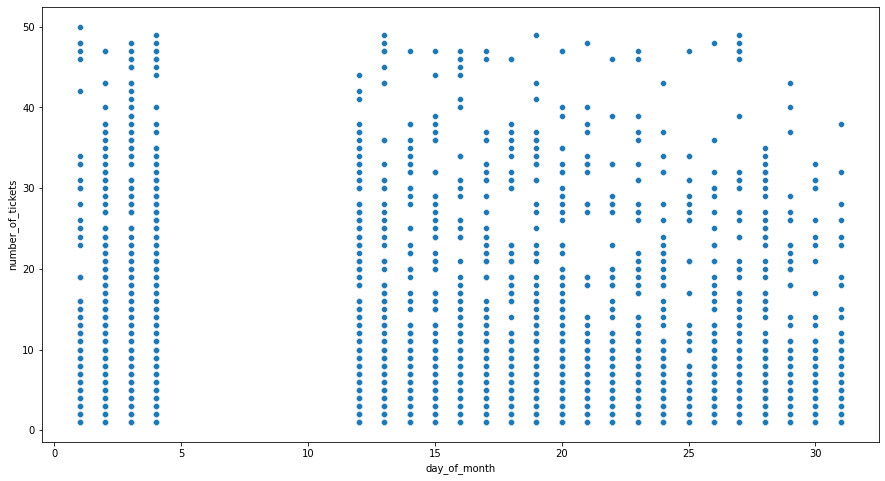

In [ ]:
#scatter plot to understand day of month relation with number of tickets.
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x=dataset['day_of_month'],y= dataset['number_of_tickets'])

Observation

*   We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.



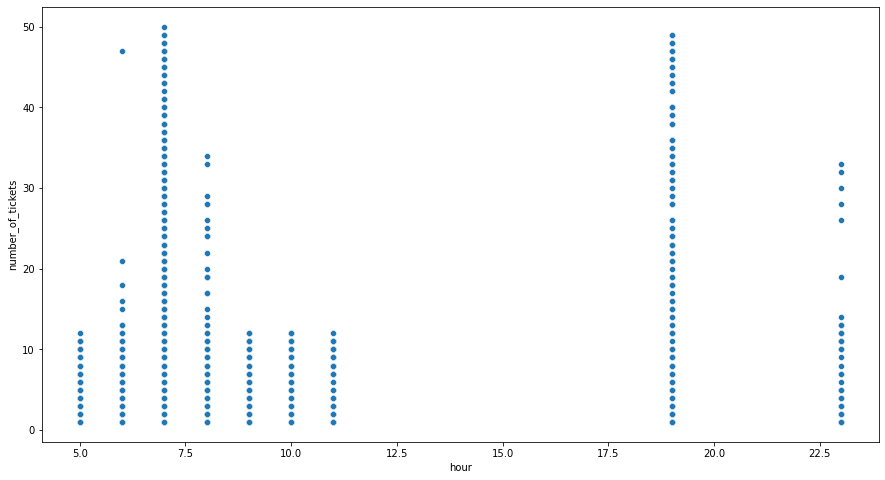

In [ ]:
#scatter plot to understand hour relation with number of tickets.
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x=dataset['hour'],y= dataset['number_of_tickets'])

Observation:

*   We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

*   From the above we can say that there is not ride between 12pm to 5.30Pm



### Let's add distance and time taken column in our dataset using Google Maps.

In [ ]:
#calculating distance between two points using google maps.
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
dataset["distance"]=dataset.travel_from.map(distance)

In [ ]:
#calculating travel time between two points using google maps.
#  7*60 is converting hours into minutes.
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
dataset["time_taken"]=dataset.travel_from.map(time)

In [ ]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,day_of_week,day_of_year,day_of_month,is_weekend,hour,minute,month,distance,time_taken
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2022-06-08 07:15:00,Migori,Nairobi,Bus,49,1,1,290,17,0,7,15,10,370.0,428
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2022-06-08 07:12:00,Migori,Nairobi,Bus,49,1,6,323,19,1,7,12,11,370.0,428
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2022-06-08 07:05:00,Keroka,Nairobi,Bus,49,1,6,330,26,1,7,5,11,280.0,300
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2022-06-08 07:10:00,Homa Bay,Nairobi,Bus,49,5,0,331,27,0,7,10,11,360.0,420
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2022-06-08 07:12:00,Migori,Nairobi,Bus,49,31,0,331,27,0,7,12,11,370.0,428


### lets see correlation of distance, time taken and number of tickets.

In [ ]:
corr_columns = dataset[['distance','time_taken','number_of_tickets']]

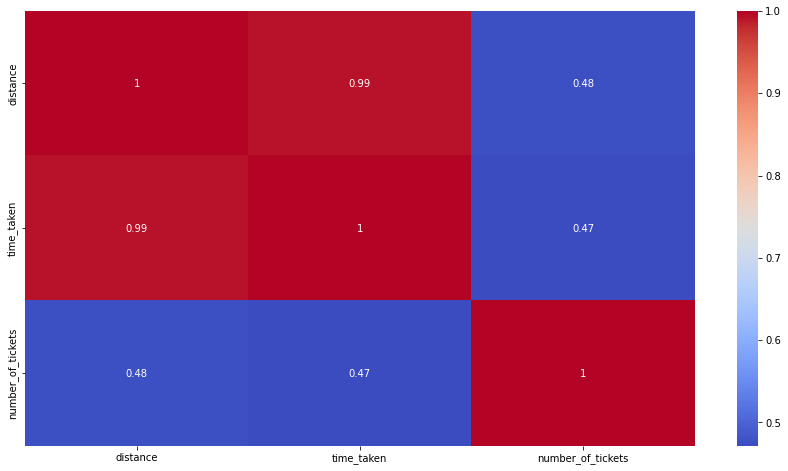

In [ ]:
correlation = corr_columns.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can see that distance and time_taken column have strong **Multicollinearity** with each other. so we have to do something about it.

*   we know that **Speed = Distance/Time** so we will use it and drop distance and time_taken.



In [ ]:
# create speed column.
dataset['speed']= dataset['distance']/dataset['time_taken']


In [ ]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,day_of_week,day_of_year,day_of_month,is_weekend,hour,minute,month,distance,time_taken,speed
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2022-06-08 07:15:00,Migori,Nairobi,Bus,49,...,1,290,17,0,7,15,10,370.0,428,0.864486
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2022-06-08 07:12:00,Migori,Nairobi,Bus,49,...,6,323,19,1,7,12,11,370.0,428,0.864486
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2022-06-08 07:05:00,Keroka,Nairobi,Bus,49,...,6,330,26,1,7,5,11,280.0,300,0.933333
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2022-06-08 07:10:00,Homa Bay,Nairobi,Bus,49,...,0,331,27,0,7,10,11,360.0,420,0.857143
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2022-06-08 07:12:00,Migori,Nairobi,Bus,49,...,0,331,27,0,7,12,11,370.0,428,0.864486


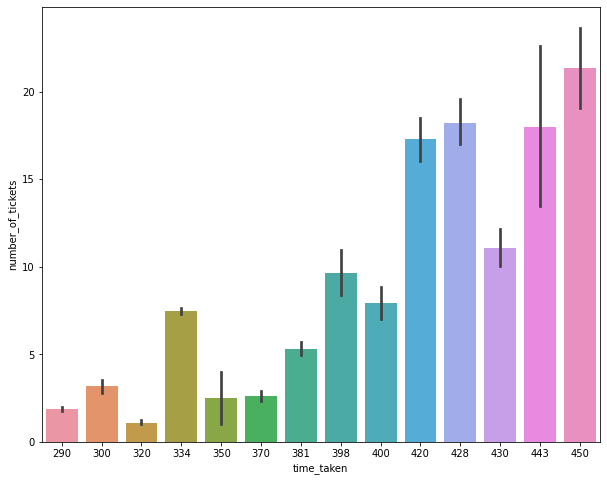

In [ ]:
plt.rcParams['figure.figsize']= (10,8)
sns.barplot(x= 'time_taken',y= 'number_of_tickets', data= dataset)

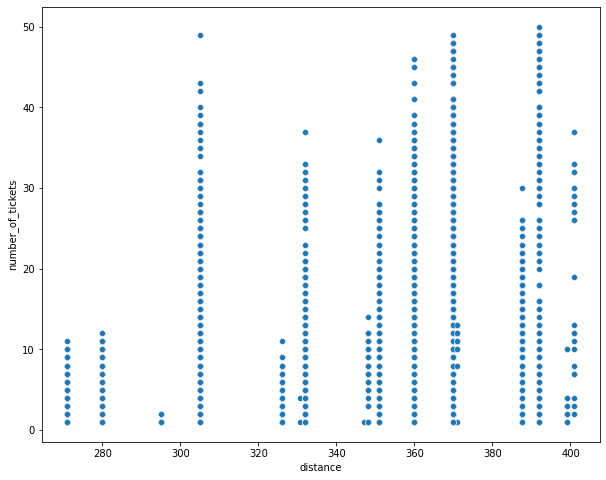

In [ ]:
plt.rcParams['figure.figsize']= (10,8)
sns.scatterplot(x= 'distance',y= 'number_of_tickets', data= dataset)
plt.show()

## **Encoding Categorical features**

In [ ]:
# coverting categorical features into Numerical.
dataset = pd.get_dummies(dataset, columns=['travel_from','car_type'], drop_first=True)

In [ ]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_to,max_capacity,number_of_tickets,day_of_week,...,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2022-06-08 07:15:00,Nairobi,49,1,1,...,0,1,0,0,0,0,0,0,0,0
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2022-06-08 07:12:00,Nairobi,49,1,6,...,0,1,0,0,0,0,0,0,0,0
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2022-06-08 07:05:00,Nairobi,49,1,6,...,0,0,0,0,0,0,0,0,0,0
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2022-06-08 07:10:00,Nairobi,49,5,0,...,0,0,0,0,0,0,0,0,0,0
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2022-06-08 07:12:00,Nairobi,49,31,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
linear_data = dataset.copy()

In [ ]:
linear_data.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_to', 'max_capacity',
       'number_of_tickets', 'day_of_week', 'day_of_year', 'day_of_month',
       'is_weekend', 'hour', 'minute', 'month', 'distance', 'time_taken',
       'speed', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'car_type_shuttle'],
      dtype='object')

In [ ]:
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','number_of_tickets', 'distance', 'time_taken', 'travel_to']


# **Implementing Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

In [ ]:
X= linear_data.drop(unnecessary_cols, axis='columns')
Y= linear_data['number_of_tickets']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=50)
reg = LinearRegression()

# fitting linear model
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.40458753088650523
Adjusted r2_score : 0.3962105156284149


In [ ]:
# Model score on Train and Test
train_model = reg.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = reg.score(X_test,y_test)
print('Testing Accuracy:',test_model)


Training Accuracy: 0.36600128368097895
Testing Accuracy: 0.40458753088650523


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 46.06390714449079
RMSE : 6.787039645124433
MAE : 4.643706935952388
MAPE : 151.21734975245298


We can see our model performence is not good, Lets try some other models.

# **Implementing Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [ ]:
lasso_data = dataset.copy()

In [ ]:
#creating dependent and independent variable
X = lasso_data.drop(unnecessary_cols, axis='columns')
Y = lasso_data['number_of_tickets']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state= 0 )

In [ ]:
X_test.shape

(1875, 26)

In [ ]:
#lasso = Lasso()
alphas = [0.01,0.025, 0.1, 1, 5, 8]
for alpha in alphas:
  lasso = Lasso(alpha=alpha ,max_iter= 1000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))


alpha:  0.01
test Score:  0.38231551395313723
train Score:  0.37091427520957965
alpha:  0.025
test Score:  0.373681519081128
train Score:  0.36348131576023557
alpha:  0.1
test Score:  0.3442986151871288
train Score:  0.3393201097005938
alpha:  1
test Score:  0.07027212115757242
train Score:  0.0911105540580901
alpha:  5
test Score:  0.04265518629740095
train Score:  0.053725590195874307
alpha:  8
test Score:  0.03733767681252009
train Score:  0.04657556793684137


we can see that alpha = 0.1 is giving us best score.

In [ ]:
lasso = Lasso(alpha=0.1 , max_iter= 1000 )
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_train = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.3442986151871288
Adjusted r2_score : 0.33507337925361436


In [ ]:
# Model score on Train and Test
train_model = lasso.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = lasso.score(X_test,y_test)
print('Testing Accuracy:',test_model)


Training Accuracy: 0.3393201097005938
Testing Accuracy: 0.3442986151871288


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 49.50688369096783
RMSE : 7.036112825343823
MAE : 5.006458102072671
MAPE : 181.63723609437997


# **Implementing Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_data = dataset.copy()

In [ ]:
#creating dependent and independent variable
X= ridge_data.drop(unnecessary_cols, axis='columns')
Y= ridge_data['number_of_tickets']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state= 0 )

In [ ]:
alpha = [0.01,0.025, 0.1, 1, 5, 8]
for alpha in alphas:
  ridge = Ridge(alpha =alpha, max_iter= 1000)
  ridge.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',ridge.score(X_test, y_test))
  print('train Score: ',ridge.score(X_train, y_train))

alpha:  0.01
test Score:  0.38518665663093166
train Score:  0.3746577498931365
alpha:  0.025
test Score:  0.38518898387575295
train Score:  0.3746574400705699
alpha:  0.1
test Score:  0.3851941636828703
train Score:  0.3746525456328035
alpha:  1
test Score:  0.3849180561549691
train Score:  0.37444852124836336
alpha:  5
test Score:  0.382703523226561
train Score:  0.37328793619458833
alpha:  8
test Score:  0.3809045842129106
train Score:  0.37236964534246775


lets take alpha =1

In [ ]:
ridge = Ridge(alpha =1, max_iter= 1000)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=1000)

In [ ]:
y_pred_train = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model = ridge.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = ridge.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.37444852124836336
Testing Accuracy: 0.3849180561549691


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.3849180561549691
Adjusted r2_score : 0.37626430586277704


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 46.44002736556766
RMSE : 6.814692022796603
MAE : 4.7313400341603185
MAPE : 164.29735143660974


# **Decision** **Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
decision_tree_data = dataset.copy()

# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','number_of_tickets', 'travel_to']

In [ ]:
# creating dependent and independant variable.
X= decision_tree_data.drop(unnecessary_cols, axis='columns')
Y= decision_tree_data['number_of_tickets']

#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )

In [ ]:
# fitting decision tree model
tree_model = DecisionTreeRegressor( criterion='squared_error', max_leaf_nodes=30,max_depth= 30,random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, max_leaf_nodes=30, random_state=0)

In [ ]:
y_pred = tree_model.predict(X_test)


In [ ]:
# Model score on Train and Test
train_model = tree_model.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = tree_model.score(X_test,y_test)
print('Testing Accuracy:',test_model)


Training Accuracy: 0.5879395837909727
Testing Accuracy: 0.5558271116850865


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.5558271116850865
Adjusted r2_score : 0.5490899281136793


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test-y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 33.53602116726233
RMSE : 5.791029370264178
MAE : 3.974281403026389
MAPE : 138.05809928418324


We can see we are not getting good score so far, Lets try **Ensemble methods**

# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_data = dataset.copy()

# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','number_of_tickets', 'travel_to']

In [ ]:
X = random_forest_data.drop(unnecessary_cols, axis='columns')
Y= random_forest_data['number_of_tickets']


#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )

In [ ]:
random_reg = RandomForestRegressor()


In [ ]:
random_reg.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = random_reg.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model = random_reg.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = random_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model)


Training Accuracy: 0.9483659301941636
Testing Accuracy: 0.6556011891789155


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6556011891789155
Adjusted r2_score : 0.6503773718966889


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 26.00286085333334
RMSE : 5.099300035625805
MAE : 3.254736
MAPE : 106.73413800954287


Our model seem to overfit lets do hyperperemeter tuning using GridSearchCV, RandomSerchCV.

# **Random forest Regressor using GridSearchCV, RandomSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error','absolute_error','poisson']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [ ]:
estimator = RandomForestRegressor()
random = RandomizedSearchCV( estimator=estimator, param_distributions=random_grid, n_iter=3, cv=2, verbose=1,
                               random_state=0 )


In [ ]:
random.fit(X_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=1)

In [ ]:
random.best_params_

{'criterion': 'squared_error',
 'max_depth': 670,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 600}

Now lets use GridSearchCV on this best parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
random_grid ={'criterion': ['squared_error'],
 'max_depth':[655,660,670],
 'max_features': ['log2'],
 'min_samples_leaf':[6],
 'min_samples_split': [5],
 'n_estimators': [550,650,600]}

In [ ]:
estimator = RandomForestRegressor()
grid = GridSearchCV( estimator=estimator, param_grid =random_grid, cv=2, verbose=1
                               ,n_jobs=-1 )

In [ ]:
grid.fit(X,Y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [655, 660, 670], 'max_features': ['log2'],
                         'min_samples_leaf': [6], 'min_samples_split': [5],
                         'n_estimators': [550, 650, 600]},
             verbose=1)

In [ ]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 670,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 600}

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model = grid.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = grid.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.6497874374033982
Testing Accuracy: 0.6650607164829023


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6650607164829023
Adjusted r2_score : 0.6599803806549074


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 25.288645924317038
RMSE : 5.028781753498261
MAE : 3.3813106000058197
MAPE : 115.97812366083835


# **XGboost**

In [ ]:
import xgboost as xgb

In [ ]:
# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','number_of_tickets', 'travel_to']

In [ ]:
xgboost_data = dataset.copy()

In [ ]:
X = xgboost_data.drop(unnecessary_cols, axis=1)
Y = xgboost_data['number_of_tickets']

#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )


In [ ]:
xgb_reg = xgb.XGBRegressor(
                        booster= 'gbtree',
                        eta= 0.004,
                        learning_rate= 0.1,
                        max_depth= 7,
                        min_child_weight= 10,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        scale_pos_weight= 1,
                        verbosity= 1)

xgb_reg.fit(X_train,y_train)

[13:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.004, max_depth=7, min_child_weight=10)

In [ ]:
y_pred = xgb_reg.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model = xgb_reg.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = xgb_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.7836316552240511
Testing Accuracy: 0.633499850139133


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.633499850139133
Adjusted r2_score : 0.6279408012788381


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 27.6715601219332
RMSE : 5.260376423977014
MAE : 3.4602423923015593
MAPE : 115.36207995767617


Our XGboost model seem to over fit lets GridSearchCV to try multiple Parameters.

# **XGboost using GridSearchCV**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb = xgb.XGBRegressor()

In [ ]:
params = {"min_child_weight":[9,10,11], 
          'eta': [0.05,0.06,0.07],
          'eval_metric':['rmse'], 
          'colsample_bytree':[0.6],
          'max_depth': [8,9,10],
          }

In [ ]:
xgb_grid = GridSearchCV(xgb,param_grid=params, verbose=1,cv=5)
xgb_grid.fit(X, Y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[13:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:01] WARNING: /workspace/src/objective/regr

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.6], 'eta': [0.05, 0.06, 0.07],
                         'eval_metric': ['rmse'], 'max_depth': [8, 9, 10],
                         'min_child_weight': [9, 10, 11]},
             verbose=1)

In [ ]:
xgb_grid.best_params_

{'colsample_bytree': 0.6,
 'eta': 0.05,
 'eval_metric': 'rmse',
 'max_depth': 8,
 'min_child_weight': 9}

In [ ]:
xgb_grid.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'eta': 0.05,
 'eval_metric': 'rmse',
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 9,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
y_pred = xgb_grid.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model = xgb_grid.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = xgb_grid.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.7922108208568129
Testing Accuracy: 0.8065395420920886


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.8065395420920886
Adjusted r2_score : 0.8036051472809176


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 14.606686229863131
RMSE : 3.82186946792576
MAE : 2.5799840289115905
MAPE : 84.51661734175063


# **Important Features**

In [ ]:
# arry of important features
importance = xgb_grid.best_estimator_.feature_importances_
importance

array([0.00773516, 0.0066615 , 0.01445963, 0.01548774, 0.00661644,
       0.04806606, 0.03854235, 0.00877728, 0.05425621, 0.04044558,
       0.44168252, 0.04865823, 0.02202144, 0.        , 0.02021351,
       0.00045868, 0.03825067, 0.0136305 , 0.03745531, 0.02581911,
       0.        , 0.02643657, 0.        , 0.00254149, 0.00738644,
       0.05360228, 0.01501091, 0.00578439], dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

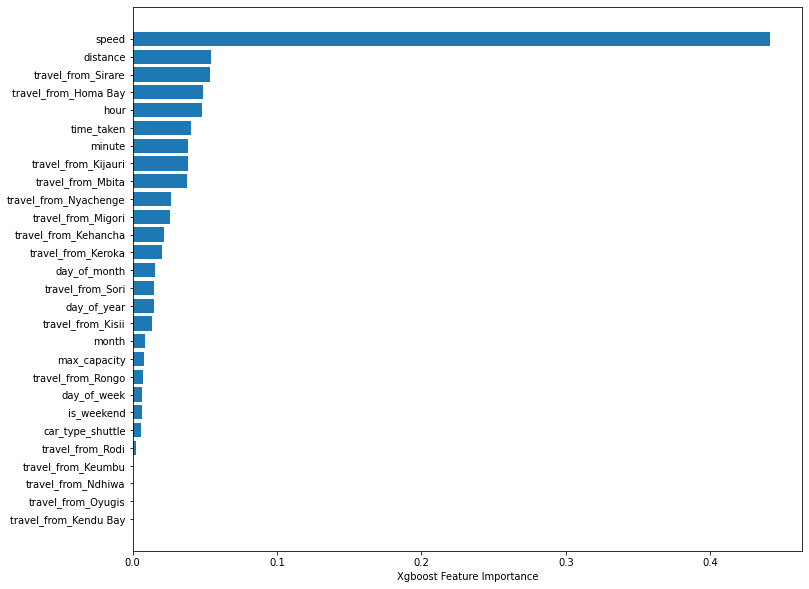

In [ ]:
# plotting important features using Xgboost in built function.
plt.figure(figsize=(12,10))
sorted_idx = xgb_grid.best_estimator_.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx],importance[sorted_idx])
plt.xlabel('Xgboost Feature Importance')

We can see the list of most important features in our data in above barplot.

# **Evaluating all  models**

Lets create dataframe containing the details of all models.

In [ ]:
# creating DataFrame containing all the evaluation Matrics.
data = {'Model Name':["Linear Regression","Lasso Regression","Ridge Regression","Decision Tree",'Random Forest','Xgboost'],'Train Accuracy':[0.36600128368097895, 0.3393201097005938, 0.3740901112166537,0.5879395837909727,0.6497874374033982, 0.7922108208568129],'Test Accuracy':[0.40458753088650523,0.3442986151871288,0.3843968747311659,0.5558271116850865,0.6650607164829023,0.8065395420920886],'r2_score':[0.40458753088650523,0.3442986151871288,0.3843968747311659,0.5558271116850865,0.6650607164829023,0.8065395420920886],'Adjusted r2_score':[0.3962105156284149,0.33507337925361436,0.3760734144111437,0.5493340591758809,0.6599803806549074,0.8036051472809176],'MSE':[46.06390714449079,49.50688369096783,46.47937769900867,33.53602116726233,25.288645924317038,14.606686229863131],'RMSE':[6.787039645124433,7.036112825343823,6.817578580332512,5.791029370264178,5.028781753498261,3.82186946792576],'MAE':[4.643706935952388,5.006458088107388,4.739804933496473,3.974281403026389,3.3813106000058197,2.5799840289115905],'MAPE':[151.21734975245298,181.63723556024522,164.65197448367923,138.05809928418324,115.97812366083835,84.51661734175063]}

In [ ]:
evaluation = pd.DataFrame(data)
evaluation

,Model Name,Train Accuracy,Test Accuracy,r2_score,Adjusted r2_score,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.366001,0.404588,0.404588,0.396211,46.063907,6.787040,4.643707,151.217350
1,Lasso Regression,0.339320,0.344299,0.344299,0.335073,49.506884,7.036113,5.006458,181.637236
2,Ridge Regression,0.374090,0.384397,0.384397,0.376073,46.479378,6.817579,4.739805,164.651974
3,Decision Tree,0.587940,0.555827,0.555827,0.549334,33.536021,5.791029,3.974281,138.058099
4,Random Forest,0.649787,0.665061,0.665061,0.659980,25.288646,5.028782,3.381311,115.978124
5,Xgboost,0.792211,0.806540,0.806540,0.803605,14.606686,3.821869,2.579984,84.516617


Observation:

1.   We can see from above table that Xgboost highest Training and Test Accuracy.
2.   Xgboost also have best r2 and Adjusted r2 score.

1.   It also have minimum MSE,RMSE,MAE and MAPE errors.
2.   From above observations we can say that Xgboost is the best Model.





# **Conclusion**



1.   **As we have implemented six different models to predict the number of seats that Mobiticket can expect to sell for each ride. Linear Regression, Regularized linear regression (Ridge and Lasso), Decision Tree, Random Forest Regressor and Xgboost Regressor. Xgboost regression model performed the best among them.**
2.   **Our Model will help Mobiticket and Bus operators to anticipate the number of tickets they can expect to sell for each ride.**

